In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2023.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player   Nation    Pos  \
0              0       Adama Traoré   es ESP  FW,MF   
1              1    Marcel Sabitzer   at AUT     MF   
2              2      Ruben Aguilar   fr FRA  DF,MF   
3              3    Vinicius Júnior   br BRA     FW   
4              4      Fikayo Tomori  eng ENG     DF   
...          ...                ...      ...    ...   
1507        2504   Souleymane Touré   fr FRA     DF   
1508        2506        Jere Uronen   fi FIN     DF   
1509        2507         Yan Valery   tn TUN     DF   
1510        2513            Vitinha   pt POR     MF   
1511        2518  Alessandro Zanoli   it ITA     DF   

                                                  Squad  \
0                               Wolves+Wolves+Barcelona   
1     RB Leipzig+RB Leipzig+Bayern Munich+Manchester...   
2                                                Monaco   
3                                           Real Madrid   
4                                   Chelsea+Milan+Milan   
...                                                 ...   
1507                                  Marseille+Auxerre   
1508                                   Brest+Schalke 04   
1509                                 Southampton+Angers   
1510                                Marseille+Paris S-G   
1511                                   Sampdoria+Napoli   

                                                  Comp   Age    Born     MP  \
0     eng Premier League+eng Premier League+es La Liga  27.0  1996.0  102.0   
1       de Bundesliga+eng Premier League+de Bundesliga  29.0  1994.0   80.0   
2                                           fr Ligue 1  30.0  1993.0   81.0   
3                                           es La Liga  23.0  2000.0  103.0   
4             eng Premier League+it Serie A+it Serie A  25.0  1997.0   82.0   
...                                                ...   ...     ...    ...   
1507                                        fr Ligue 1  19.0  2003.0   24.0   
1508                          fr Ligue 1+de Bundesliga  28.0  1994.0   17.0   
1509                     eng Premier League+fr Ligue 1  23.0  1999.0   31.0   
1510                                        fr Ligue 1  22.0  2000.0   50.0   
1511                                        it Serie A  21.0  2000.0   23.0   

      Starts     Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0       54.0  5594.0  62.1         0.08       0.16        0.08          0.16   
1       46.0  4235.0  47.1         0.21       0.34        0.13          0.25   
2       63.0  5537.0  61.5         0.02       0.10        0.02          0.10   
3       84.0  7482.0  83.2         0.36       0.62        0.36          0.62   
4       78.0  6989.0  77.7         0.02       0.04        0.02          0.04   
...      ...     ...   ...          ...        ...         ...           ...   
1507    18.0  1656.0  18.4         0.05       0.05        0.05          0.05   
1508    12.0   976.0  10.8         0.00       0.09        0.00          0.09   
1509    31.0  2542.0  28.2         0.00       0.00        0.00          0.00   
1510    34.0  2910.0  32.4         0.12       0.22        0.12          0.22   
1511    16.0  1552.0  17.2         0.12       0.29        0.12          0.29   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.11          0.31        0.11            0.31               457.0   
1         0.25          0.31        0.17            0.25                38.0   
2         0.02          0.13        0.02            0.13                54.0   
3         0.35          0.62        0.35            0.62               596.0   
4         0.04          0.04        0.04            0.04                22.0   
...        ...           ...         ...             ...                 ...   
1507      0.08          0.02        0.08            0.02                19.0   
1508      0.01          0.13        0.01            0.13                12.0   
1509  

In [4]:
# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2023

Unnamed: 0.1  Unnamed: 0             Player  Nation    Pos  \
0                0           0   Brenden Aaronson  us USA  MF,FW   
4                4           4   Yunis Abdelhamid  ma MAR     DF   
5                5           5      Himad Abdelli  dz ALG  MF,FW   
6                6           6  Salis Abdul Samed  gh GHA     MF   
7                7           7    Laurent Abergel  fr FRA     MF   
...            ...         ...                ...     ...    ...   
2511          2511         148     Gonzalo Villar  es ESP     MF   
2513          2513         150            Vitinha  pt POR     MF   
2516          2516         153   Christopher Wooh  cm CMR     MF   
2518          2518         155  Alessandro Zanoli  it ITA     DF   
2519          2519         156       Akim Zedadka  dz ALG  DF,MF   

                    Squad                   Comp  Age  Born  MP  Starts   Min  \
0            Leeds United     eng Premier League   21  2000  36      28  2372   
4                   Reims             fr Ligue 1   34  1987  37      37  3330   
5                  Angers             fr Ligue 1   22  1999  30      24  2137   
6                    Lens             fr Ligue 1   22  2000  33      33  2894   
7                 Lorient             fr Ligue 1   29  1993  29      28  2342   
...                   ...                    ...  ...   ...  ..     ...   ...   
2511     Sampdoria+Getafe  it Serie A+es La Liga   24  1998  31      11  1153   
2513  Marseille+Paris S-G             fr Ligue 1   22  2000  50      34  2910   
2516          Rennes+Lens             fr Ligue 1   20  2001  14      12  1010   
2518     Sampdoria+Napoli             it Serie A   21  2000  23      16  1552   
2519        Auxerre+Lille             fr Ligue 1   27  1995  28      23  1953   

       90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0     26.4         0.04       0.15        0.04          0.15      0.15   
4     37.0         0.03       0.08        0.03          0.08      0.06   
5     23.7         0.08       0.17        0.08          0.17      0.06   
6     32.2         0.03       0.06        0.03          0.06      0.03   
7     26.0         0.00       0.04        0.00          0.04      0.02   
...    ...          ...        ...         ...           ...       ...   
2511  12.8         0.00       0.00        0.00          0.00      0.01   
2513  32.4         0.12       0.22        0.12          0.22      0.22   
2516  11.2         0.00       0.00        0.00          0.00      0.06   
2518  17.2         0.12       0.29        0.12          0.29      0.16   
2519  21.7         0.05       0.05        0.05          0.05      0.04   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.31        0.15            0.31               100.0   
4             0.09        0.06            0.09                37.0   
5             0.18        0.06            0.18                76.0   
6             0.08        0.03            0.08                49.0   
7             0.07        0.02            0.07                41.0   
...            ...         ...             ...                 ...   
2511          0.06        0.01            0.06                26.0   
2513          0.88        0.22            0.88                64.0   
2516          0.06        0.06            0.06                 2.0   
2518          0.15        0.16            0.15                45.0   
2519          0.15        0.04            0.15                43.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0              34.0            34.0              48.0               48.0   
4              21.0            56.8              14.0               37.8   
5              43.0            56.6              28.0               36.8   
6              29.0            59.2              13.0               26.5   
7              23.0            56.1              14.0               34.1   
...             ...           

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out only the midfields (MF) from the 'final_player' DataFrame
midfield_players = final_player[final_player['Pos'] == 'MF']
newbie=newbie[newbie['Pos']=='MF']
player_2021=player_2021[player_2021['Pos']=='MF']
player_2022=player_2022[player_2022['Pos']=='MF']
player_2023=player_2023[player_2023['Pos']=='MF']
# Reset the index if needed
midfield_players = midfield_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)

In [6]:
# Step 1: Extract names from 'newbie' DataFrame
newbie_players_list = newbie['Player'].tolist()

# Step 2: Filter 'midfield_players' based on the names from 'newbie'
filtered_midfield_players = midfield_players[midfield_players['Player'].isin(newbie_players_list)]

# Optional: Reset the index of the filtered DataFrame
filtered_midfield_players = filtered_midfield_players.reset_index(drop=True)


In [7]:
final_player.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts',
       ...
       'Penalty_Kicks_Conceded_per_90', 'Ball_Recoveries_per_90',
       'Aerials_Won_per_90', 'Aerials_Lost_per_90', 'Seasons at top 5',
       'Seasons in PL', 'Seasons in Liga', 'Seasons in Serie A',
       'Seasons in Ligue 1', 'Seasons in Bundesliga'],
      dtype='object', length=124)

In [8]:
Rice_2023=player_2023[player_2023['Player']=='Declan Rice']
Rice_2023

Unnamed: 0.1  Unnamed: 0       Player   Nation Pos     Squad  \
242          1850        2233  Declan Rice  eng ENG  MF  West Ham   

                   Comp  Age  Born  MP  Starts   Min   90s  Goals_per90  \
242  eng Premier League   23  1999  37      36  3273  36.4         0.11   

     G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
242       0.14        0.11          0.14      0.07          0.15        0.04   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
242            0.13                63.0           35.0            55.6   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
242              23.0               36.5           67.99   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
242                    3.38                   18.41                   38.98   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
242                    11.9                    0.66   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
242                      67.97                       1.73   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
242                  0.96                     0.63           39.95   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
242                 251.24                               134.45   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
242                        2.42                2.06   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
242                         0.14                0.77                 0.71   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
242                   45.11                                1.02   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
242                        2.75                     0.16   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
242                   2.36                   0.19                  0.03   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
242              0.03                     0.05                   0.08   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
242                   0.16                    0.0                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
242               0.0                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
242            1846.0            2135.0               86.5         33652.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
242          9456.0             850.0             944.0               90.0   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
242              735.0              789.0                93.2   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
242            223.0            324.0              68.8            0.03   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
242        0.09       0.05         -0.06               1.02   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
242                6.4                        0.36   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
242                         0.08                       6.59   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
242                    58.65                    56.59   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
242                     1.92                     1.32                  0.11   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
242             1.65            1.21                    0.08   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
242                 0.52                    0.41          

In [9]:
Rice_2021=player_2021[player_2021['Player']=='Declan Rice']
Rice_2021

Unnamed: 0.1  Unnamed: 0       Player   Nation Pos     Squad  \
255          1868      2207.0  Declan Rice  eng ENG  MF  West Ham   

                   Comp   Age    Born    MP  Starts     Min   90s  \
255  eng Premier League  21.0  1999.0  32.0    32.0  2879.0  32.0   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
255         0.06       0.09        0.03          0.06       0.1          0.16   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
255        0.05            0.11                34.0           29.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
255            85.3               5.0               14.7           57.81   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
255                    2.56                   14.53                   34.69   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
255                    9.53                    1.28   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
255                      57.75                       1.06   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
255                  0.91                     0.16           33.31   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
255                 229.06                               123.44   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
255                        2.31                1.81   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
255                         0.25                1.06                 0.59   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
255                   37.78                                1.16   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
255                        1.84                     0.19   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
255                   1.56                   0.03                  0.09   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
255              0.09                     0.03                   0.03   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
255                   0.16                    0.0                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
255              0.03                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
255            1352.0            1561.0               86.6         23571.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
255          6640.0             613.0             674.0               90.9   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
255              565.0              620.0                91.1   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
255            138.0            191.0              72.3            0.03   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
255        0.06       0.05         -0.02               0.69   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
255               3.91                        0.56   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
255                         0.19                       5.28   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
255                    48.78                    48.09   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
255                     0.56                      0.5                  0.03   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
255             0.75            0.94                    0.03   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
255                  0.0                    

In [10]:
Rice_2022=player_2022[player_2022['Player']=='Declan Rice']
Rice_2022

Unnamed: 0.1  Unnamed: 0       Player   Nation Pos     Squad  \
270          1880      2248.0  Declan Rice  eng ENG  MF  West Ham   

                   Comp   Age    Born    MP  Starts     Min   90s  \
270  eng Premier League  22.0  1999.0  36.0    35.0  3179.0  35.3   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
270         0.03       0.14        0.03          0.14      0.03          0.08   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
270        0.03            0.08                72.0           50.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
270            69.4              22.0               30.6           72.18   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
270                     3.6                   18.07                   43.85   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
270                   11.33                    1.44   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
270                      72.18                       2.04   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
270                  1.42                     0.62           46.46   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
270                 322.29                               165.92   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
270                        2.95                 2.8   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
270                         0.45                0.74                 0.57   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
270                   50.34                                1.25   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
270                        2.21                     0.25   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
270                    1.9                    0.0                  0.14   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
270              0.08                      0.0                   0.08   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
270                   0.25                    0.0                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
270               0.0                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
270            1986.0            2197.0               90.4         35788.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
270          9260.0             848.0             903.0               93.9   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
270              887.0              938.0                94.6   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
270            203.0            258.0              78.7            0.11   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
270        0.05       0.04          0.07               0.68   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
270               7.25                        0.74   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
270                         0.11                       7.25   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
270                    62.24                    61.44   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
270                     0.59                      0.4                  0.03   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
270             0.88            0.85                     0.2   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
270                  0.0                    

In [11]:
Rice=midfield_players[midfield_players['Player']=='Declan Rice']
Rice

Unnamed: 0       Player   Nation Pos     Squad                Comp   Age  \
151         602  Declan Rice  eng ENG  MF  West Ham  eng Premier League  24.0   

       Born     MP  Starts     Min    90s  Goals_per90  G+A_per90  G-PK_per90  \
151  1999.0  105.0   103.0  9331.0  103.7         0.07       0.12        0.06   

     G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
151          0.12      0.07          0.13        0.04            0.11   

     Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
151               169.0          114.0            67.0              50.0   

     Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
151               30.0           66.27                     3.2   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
151                    17.1                   39.31                   10.97   

     Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
151                    1.12                      66.25   

     Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
151                       1.63                   1.1                     0.48   

     Carries_per_90  Total_Distance_per_90  \
151           40.12                 268.58   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
151                               141.77                        2.57   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
151                2.23                         0.28                0.85   

     Dispossessed_per_90  Passes_Received_per_90  \
151                 0.63                   44.63   

     Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
151                                1.14                        2.29   

     Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
151                      0.2                   1.96                   0.08   

     Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
151                  0.09              0.07                     0.03   

     Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
151                   1.96                   0.19                    0.0   

     Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
151                   0.0              0.01                      0.0   

     Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
151                    0.0            5184.0            5893.0   

     Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
151               88.0         93011.0         25356.0            2311.0   

     Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  \
151            2521.0               92.0             2187.0   

     Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  \
151             2347.0                93.0            564.0            773.0   

     Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  \
151              73.0            0.06        0.07       0.05          -0.0   

     Key_Passes_per_90  Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
151                0.8               5.92                        0.55   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
151                         0.12                       6.41   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
151                    56.83                    55.62   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
151                     1.05                     0.75                  0.06   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
151             1.11             1.0                    0.11   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
151                 0.18                    0.14                     0.01   

     

In [12]:
for column in midfield_players.columns:
    print(column)

Unnamed: 0
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Goals_per90
G+A_per90
G-PK_per90
G+A-PK_per90
xG_per90
xG+xAG_per90
npxG_per90
npxG+xAG_per90
Take_Ons_Attempted
Take_Ons_Succ
Take_Ons_Succ%
Tackled_Take_Ons
Tackled_Take_Ons%
Touches_per_90
Touches_Def_Pen_per_90
Touches_Def_3rd_per_90
Touches_Mid_3rd_per_90
Touches_Att_3rd_per_90
Touches_Att_Pen_per_90
Tocuhes_Live_Balls_per_90
Take_Ons_Attempted_per_90
Take_Ons_Succ_per_90
Tackled_Take_Ons_per_90
Carries_per_90
Total_Distance_per_90
Progressive_Distance_Carried_per_90
Progressive_Carries_per_90
1/3_Carries_per_90
Carries_Penalty_Area_per_90
Miscontrols_per_90
Dispossessed_per_90
Passes_Received_per_90
Progressive_Passes_Received_per_90
Shot_Creating_Action_per90
Goal_Creating_Action_90
Pass_Live_Shot_per_90
Pass_Dead_Shot_per_90
Take_Ons_Shot_per_90
Shot-Shot_per_90
Fouls_drawn_Shot_per_90
Defensive_Shot_per_90
Pass_Live_Goal_per_90
Pass_Dead_Goal_per_90
Take_Ons_Goal_per_90
Shot_Goal_per_90
Fouls_Drawn_Goal_per_90


In [13]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = midfield_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
rice_percentile_ranks = round(players_percentile_ranks.iloc[[151]],0)

# Print the percentile ranks for Declan Rice
print(rice_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
151         49.0       37.0        47.0          38.0      42.0          34.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
151        20.0            26.0                90.0           94.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
151            82.0              83.0               24.0            71.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
151                    89.0                    87.0                    74.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
151                    34.0                    46.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
151                       72.0                       57.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
151                  68.0                     45.0            68.0   

     Tota

In [14]:
import pandas as pd





params=['Take_Ons_Succ_per_90',   'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90',  'Tocuhes_Live_Balls_per_90', 'Carries_per_90', 
        'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
         'Passes_Short_Cmp%','Passes_Medium_Cmp%', 'Passes_Long_Cmp%', 
         'Passes_1/3_per_90', 'Progressive_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = midfield_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
rice_percentile_ranks = round(players_percentile_ranks.iloc[[270]],0)

# Print the percentile ranks for Harry Kane
print(rice_percentile_ranks)


     Take_Ons_Succ_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
270                  14.0                    99.0                    56.0   

     Tocuhes_Live_Balls_per_90  Carries_per_90  \
270                       63.0            40.0   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
270                                 12.0                         4.0   

     1/3_Carries_per_90  Miscontrols_per_90  Dispossessed_per_90  \
270                 3.0                55.0                 22.0   

     Passes_Short_Cmp%  Passes_Medium_Cmp%  Passes_Long_Cmp%  \
270               40.0                48.0              37.0   

     Passes_1/3_per_90  Progressive_Passes_per_90  
270               27.0                       32.0  


In [15]:
rice_percentile_ranks_list = rice_percentile_ranks.values.flatten().tolist()

rice_percentile_ranks_list

[14.0,
 99.0,
 56.0,
 63.0,
 40.0,
 12.0,
 4.0,
 3.0,
 55.0,
 22.0,
 40.0,
 48.0,
 37.0,
 27.0,
 32.0]

In [16]:
import pandas as pd





params=['Take_Ons_Succ_per_90',   'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90',  'Tocuhes_Live_Balls_per_90', 'Carries_per_90', 
        'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
         'Passes_Short_Cmp%','Passes_Medium_Cmp%', 'Passes_Long_Cmp%', 
         'Passes_1/3_per_90', 'Progressive_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
rice_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[242]],0)

# Print the percentile ranks for Declan Rice
print(rice_2023_percentile_ranks)


     Take_Ons_Succ_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
242                  68.0                    90.0                    72.0   

     Tocuhes_Live_Balls_per_90  Carries_per_90  \
242                       75.0            67.0   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
242                                 91.0                        87.0   

     1/3_Carries_per_90  Miscontrols_per_90  Dispossessed_per_90  \
242                84.0                17.0                 38.0   

     Passes_Short_Cmp%  Passes_Medium_Cmp%  Passes_Long_Cmp%  \
242               70.0                95.0              68.0   

     Passes_1/3_per_90  Progressive_Passes_per_90  
242               89.0                       80.0  


In [17]:
rice_2023_percentile_ranks_list = rice_2023_percentile_ranks.values.flatten().tolist()

rice_2023_percentile_ranks_list

[68.0,
 90.0,
 72.0,
 75.0,
 67.0,
 91.0,
 87.0,
 84.0,
 17.0,
 38.0,
 70.0,
 95.0,
 68.0,
 89.0,
 80.0]

In [18]:
import pandas as pd





params=['Take_Ons_Succ_per_90',   'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90',  'Tocuhes_Live_Balls_per_90', 'Carries_per_90', 
        'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
         'Passes_Short_Cmp%','Passes_Medium_Cmp%', 'Passes_Long_Cmp%', 
         'Passes_1/3_per_90', 'Progressive_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2022_percentile_ranks = player_2022[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
rice_2022_percentile_ranks = round(players_2022_percentile_ranks.iloc[[270]],0)

# Print the percentile ranks for Declan Rice
print(rice_2022_percentile_ranks)


     Take_Ons_Succ_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
270                  82.0                    91.0                    83.0   

     Tocuhes_Live_Balls_per_90  Carries_per_90  \
270                       84.0            89.0   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
270                                 99.0                        93.0   

     1/3_Carries_per_90  Miscontrols_per_90  Dispossessed_per_90  \
270                96.0                 8.0                 23.0   

     Passes_Short_Cmp%  Passes_Medium_Cmp%  Passes_Long_Cmp%  \
270               96.0                98.0              91.0   

     Passes_1/3_per_90  Progressive_Passes_per_90  
270               94.0                       90.0  


In [19]:
rice_2022_percentile_ranks_list = rice_2022_percentile_ranks.values.flatten().tolist()

rice_2022_percentile_ranks_list

[82.0,
 91.0,
 83.0,
 84.0,
 89.0,
 99.0,
 93.0,
 96.0,
 8.0,
 23.0,
 96.0,
 98.0,
 91.0,
 94.0,
 90.0]

In [20]:
import pandas as pd





params=['Take_Ons_Succ_per_90',   'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90',  'Tocuhes_Live_Balls_per_90', 'Carries_per_90', 
        'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
         'Passes_Short_Cmp%','Passes_Medium_Cmp%', 'Passes_Long_Cmp%', 
         'Passes_1/3_per_90', 'Progressive_Passes_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
rice_2021_percentile_ranks = round(players_2021_percentile_ranks.iloc[[255]],0)

# Print the percentile ranks for Declan Rice
print(rice_2021_percentile_ranks)


     Take_Ons_Succ_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
255                  51.0                    67.0                    48.0   

     Tocuhes_Live_Balls_per_90  Carries_per_90  \
255                       44.0            50.0   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
255                                 89.0                        82.0   

     1/3_Carries_per_90  Miscontrols_per_90  Dispossessed_per_90  \
255                78.0                28.0                 29.0   

     Passes_Short_Cmp%  Passes_Medium_Cmp%  Passes_Long_Cmp%  \
255               72.0                80.0              72.0   

     Passes_1/3_per_90  Progressive_Passes_per_90  
255               47.0                       58.0  


In [21]:
rice_2021_percentile_ranks_list = rice_2021_percentile_ranks.values.flatten().tolist()

rice_2021_percentile_ranks_list

[51.0,
 67.0,
 48.0,
 44.0,
 50.0,
 89.0,
 82.0,
 78.0,
 28.0,
 29.0,
 72.0,
 80.0,
 72.0,
 47.0,
 58.0]

In [22]:
image_path = "Rice.jpg"
fdj_cropped = Image.open(image_path)


In [23]:
len(params)

15

In [24]:
split_params = [param.replace('_', '\n') for param in params]


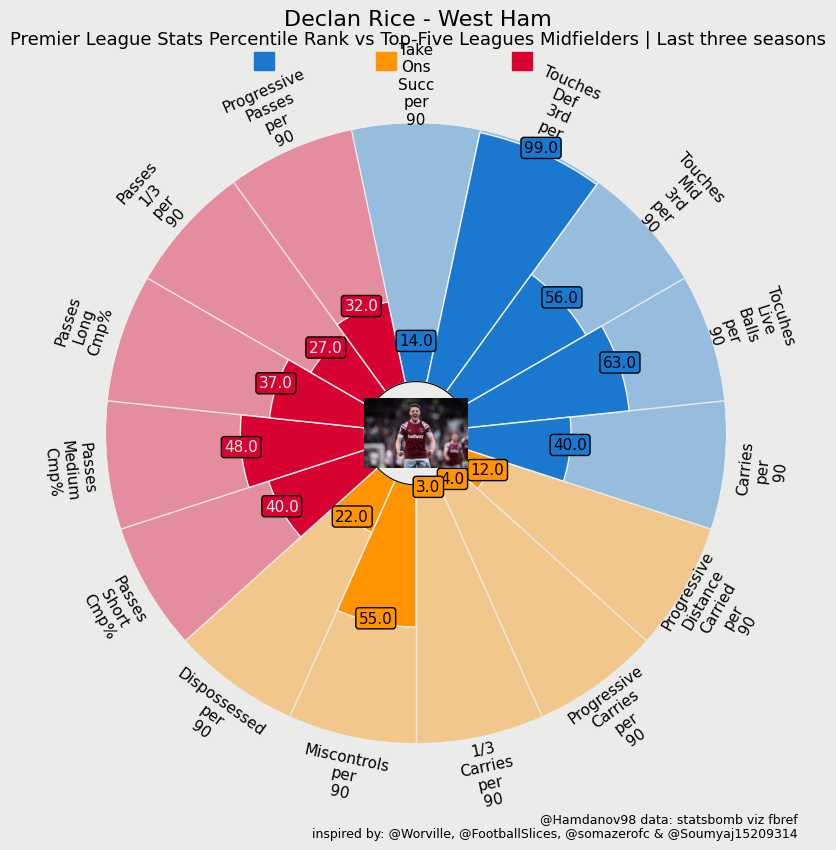

In [25]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    rice_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Declan Rice - West Ham", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Rice_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


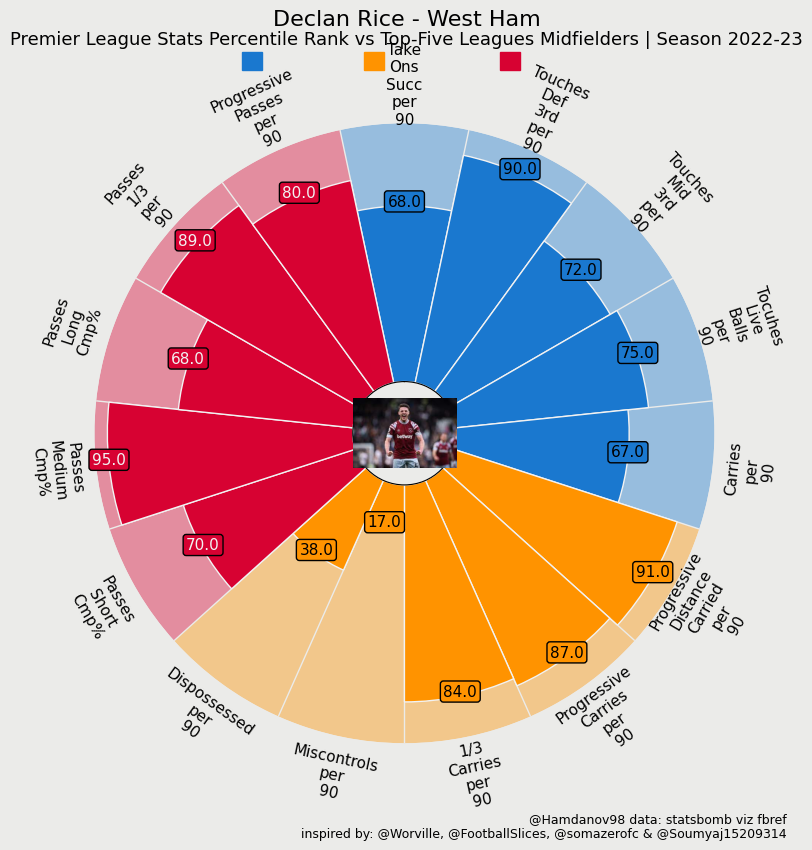

In [26]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    rice_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Declan Rice - West Ham", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Rice_2023_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


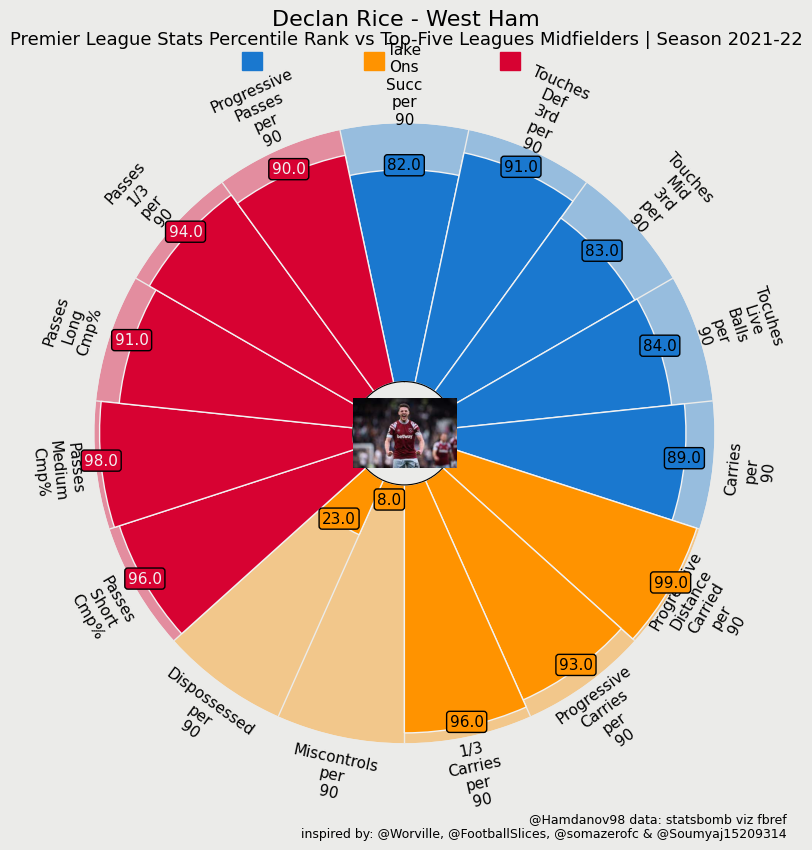

In [27]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    rice_2022_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Declan Rice - West Ham", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders | Season 2021-22",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Rice_2022_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


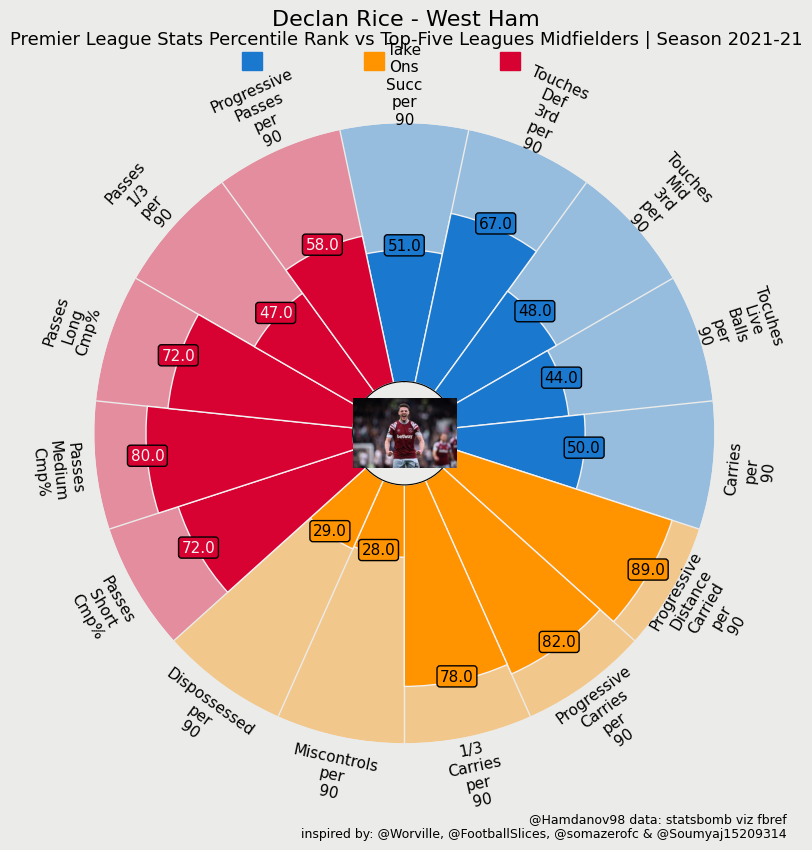

In [28]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    rice_2021_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Declan Rice - West Ham", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders | Season 2021-21",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Rice_2021_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [29]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_midfield_players = midfield_players.select_dtypes(include=np.number)
numerical_midfield_players = numerical_midfield_players.iloc[:, 3:]
numerical_midfield_players = numerical_midfield_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_midfield_players = (numerical_midfield_players - numerical_midfield_players.mean()) / numerical_midfield_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_midfield_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.2296564997193393,
 0.405039090380356,
 0.48870860782895514,
 0.5593235117073003,
 0.5978536559796354,
 0.6314513580177881,
 0.66017615431607,
 0.6839282636126569,
 0.7033500068084299,
 0.7207469267328553,
 0.7366682332681477,
 0.7516602148645771,
 0.7657727201748493,
 0.7787764086406712,
 0.7911954792984401]

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_midfield_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_midfield_players.index)



In [31]:
# Remove Declan Rice's row and store it in a separate variable
rice_data = transformed_df.iloc[151].copy()
transformed_df = transformed_df.drop(transformed_df.index[151])

# Compute cosine similarity between each player and Declan Rice
similarity_scores = cosine_similarity(transformed_df, rice_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_rice'] = similarity_scores

# Display the top 10 players most similar to rice
top_similar_players = transformed_df.sort_values('similarity_to_rice', ascending=False).head(10)
top_similar_players

0         1         2         3         4         5         6  \
88   2.181133 -4.762121 -1.774704 -0.635330 -0.467308 -0.033606 -1.092751   
103  6.095025 -9.900107 -2.426531 -0.646171  0.841614 -1.985806  2.166374   
72   4.630091 -6.915782 -1.635372  0.418127  1.048759  0.513238 -1.376900   
30   3.207216 -7.708254 -2.528696 -0.895278 -0.922394  0.672991 -0.200892   
33   0.954948 -5.274360 -3.126846 -0.949248 -0.063420  0.586654 -0.274972   
45   2.939430 -6.337130 -0.489760 -2.607835 -0.030833 -0.612445 -0.017221   
53   2.083445 -7.400135 -1.894725 -1.077323 -1.355888  1.696407 -1.267300   
162  3.807028 -6.427595 -1.805730 -1.961863  0.227842  0.335243  0.545030   
5    8.784367 -7.407149 -0.538890 -3.035754  2.031172 -0.939347 -1.006274   
77   1.016854 -4.785952 -2.989237 -0.552840 -2.296379  1.108695  0.035464   

            7         8         9        10        11        12        13  \
88  -0.910334 -0.332180 -0.823224  0.751955  0.118317 -1.337958  0.530540   
103  1.170063 -1.288506 -1.957256 -0.576572 -0.553514 -0.079589 -0.598202   
72  -0.855305  0.238201 -0.002481 -0.160562  0.611544  0.097910  1.226584   
30  -2.389761 -0.998283  0.570083 -1.786198 -0.126148  0.957379  0.178442   
33  -0.457221  1.716234 -0.172935 -0.941499 -0.385925  0.293231  0.827965   
45  -0.308663  0.811292 -0.194488  0.897782 -1.274670  2.272104  0.630774   
53  -0.814983 -1.198240  1.192711 -1.093899  0.025457  0.328548 -1.001628   
162 -1.330296  1.608800  1.040222 -2.166888  0.098664  0.253384  0.562401   
5   -0.288126 -1.483505 -0.699472 -0.631790  0.970032 -0.101571 -0.496138   
77  -0.278482 -0.369193  0.043935 -1.555952  0.178571  0.742023 -0.192306   

           14  similarity_to_rice  
88   0.847758            0.913023  
103  0.902385            0.905505  
72  -0.735416            0.885481  
30  -1.214157            0.856647  
33   0.908332            0.853674  
45   1.722361            0.845411  
53  -0.664866            0.840814  
162 -0.313843            0.837990  
5    0.341004            0.833957  
77  -0.509975            0.826532

In [32]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_rice', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = midfield_players.loc[top_similar_players_indices]
top_similar_players

Unnamed: 0                          Player   Nation Pos  \
88          363                    Remo Freuler   ch SUI  MF   
103         420                 Pierre Højbjerg   dk DEN  MF   
72          314                Manuel Locatelli   it ITA  MF   
30          138                  Benjamin André   fr FRA  MF   
33          157                 Cheick Doucouré   ml MLI  MF   
45          209                   Thomas Partey   gh GHA  MF   
53          239                 Boubacar Kamara   fr FRA  MF   
162         639             Aurélien Tchouaméni   fr FRA  MF   
5            20                           Rodri   es ESP  MF   
77          327                 Laurent Abergel   fr FRA  MF   
143         579                            Koke   es ESP  MF   
70          303                     Rúben Neves   pt POR  MF   
145         586                Valentin Rongier   fr FRA  MF   
48          227                        Jorginho   it ITA  MF   
119         481                 Sergio Busquets   es ESP  MF   
89          368                    Jordan Ferri   fr FRA  MF   
135         549                Marcelo Brozović   hr CRO  MF   
136         552                William Carvalho   pt POR  MF   
120         482                  Marten de Roon   nl NED  MF   
78          330               Pierre Lees-Melou   fr FRA  MF   
13           76                   Thiago Mendes   br BRA  MF   
59          265                Fabián Ruiz Peña   es ESP  MF   
17           86                  Jerdy Schouten   nl NED  MF   
179         726                            Fred   br BRA  MF   
152         606                     Joan Jordán   es ESP  MF   
19           98                 Guido Rodríguez   ar ARG  MF   
132         537                   Yves Bissouma   ml MLI  MF   
114         455                 Youri Tielemans   be BEL  MF   
144         585                          Walace   br BRA  MF   
47          226               Rodrigo Bentancur   uy URU  MF   
133         539                    Douglas Luiz   br BRA  MF   
92          375                Pedro Chirivella   es ESP  MF   
46          221                Martín Zubimendi   es ESP  MF   
196         821               Salis Abdul Samed   gh GHA  MF   
69          301                   Daniel Parejo   es ESP  MF   
156         617                 Scott McTominay  sct SCO  MF   
18           94              Idrissa Gana Gueye   sn SEN  MF   
125         500                Maxence Caqueret   fr FRA  MF   
98          393                 Ismaël Bennacer   dz ALG  MF   
155         615                  Étienne Capoue   fr FRA  MF   
76          326                   Franck Kessié   ci CIV  MF   
127         507                 Youssouf Fofana   fr FRA  MF   
57          262                Thiago Alcántara   es ESP  MF   
170         690                Mattéo Guendouzi   fr FRA  MF   
164         654                     Wataru Endo   jp JPN  MF   
123         491                    Mario Lemina   ga GAB  MF   
180         734               Nicolás Domínguez   ar ARG  MF   
27          130                   João Moutinho   pt POR  MF   
126         503                   Ellyes Skhiri   tn TUN  MF   
51          236                  Marco Verratti   it ITA  MF   
121         483                     Oriol Romeu   es ESP  MF   
149         600               Eduardo Camavinga   fr FRA  MF   
146         593                 Khéphren Thuram   fr FRA  MF   
177         708                     Djibril Sow   ch SUI  MF   
128         510      Andre-Frank Zambo Anguissa   cm CMR  MF   
109         445                  Haris Belkebla   dz ALG  MF   
174         702                        Fernando   br BRA  MF   
50          234                   Adrien Rabiot   fr FRA  MF   
66          293                   Mateo Kovačić   hr CRO  MF   
207         884               Stanislav Lobotka   sk SVK  MF   
11           67                     Luka Modrić   hr CRO  MF   
110         451                  Sofy

In [33]:
midfield_players['similarity_to_rice']=transformed_df['similarity_to_rice']
midfield_players[['Player', 'similarity_to_rice']]


Player  similarity_to_rice
0                   Marcel Sabitzer           -0.251480
1                      Nadiem Amiri           -0.272604
2                   Jude Bellingham            0.278919
3                    Yangel Herrera           -0.367377
4                   Jeffrey Schlupp           -0.196382
5                             Rodri            0.833957
6                         Raúl Guti            0.073656
7                       Salih Özcan            0.329501
8                   Bruno Fernandes            0.191621
9                   Mattia Zaccagni           -0.122520
10                     Denis Suárez            0.422161
11                      Luka Modrić            0.567750
12                Federico Valverde            0.465522
13                    Thiago Mendes            0.729432
14                  Mauro Arambarri           -0.008366
15                     Carlos Soler           -0.033753
16                    Sandro Tonali            0.255918
17                   Jerdy Schouten            0.723066
18               Idrissa Gana Gueye            0.661578
19                  Guido Rodríguez            0.717619
20                   Robert Andrich            0.340639
21                     Thomas Lemar           -0.238466
22                       Pape Gueye            0.201042
23                  Dimitri Liénard           -0.064153
24                     Luis Alberto            0.342098
25               Geoffrey Kondogbia            0.119606
26                   Darko Brašanac           -0.502675
27                    João Moutinho            0.612332
28                    Alfred Duncan            0.011219
29                   Thomas Mangani            0.508227
30                   Benjamin André            0.856647
31                    Jon Moncayola            0.396447
32                   Omar Mascarell            0.317544
33                  Cheick Doucouré            0.853674
34                    Dwight McNeil            0.115625
35                      Dani García            0.023231
36                     Tomáš Souček            0.238771
37                    Carlos Gruezo           -0.195622
38                      Mason Mount           -0.037736
39                     Orel Mangala            0.050284
40             Maximilian Eggestein            0.021056
41                   Nicolas Höfler            0.437017
42               Nemanja Maksimović           -0.104261
43              Giacomo Bonaventura            0.114507
44                      David Silva           -0.018856
45                    Thomas Partey            0.845411
46                 Martín Zubimendi            0.690263
47                Rodrigo Bentancur            0.712932
48                         Jorginho            0.808626
49                  Martin Ødegaard            0.171912
50                    Adrien Rabiot            0.579086
51                   Marco Verratti            0.608749
52                  Conor Gallagher            0.016605
53                  Boubacar Kamara            0.840814
54                      Mikel Vesga            0.186911
55                    Lucas Tousart           -0.101456
56                     Ivan Rakitić            0.403575
57                 Thiago Alcántara            0.637522
58                  Hicham Boudaoui            0.040409
59                 Fabián Ruiz Peña            0.728952
60                  Andrés Guardado            0.299442
61                       Saša Lukić            0.540471
62                      Seko Fofana            0.480883
63                     Răzvan Marin            0.364877
64                   Xaver Schlager            0.104126
65                       Arne Maier           -0.483629
66                    Mateo Kovačić            0.574308
67                   Angelo Fulgini            0.094470
68                   Marc Cucurella            0.212264
69                    Daniel Parejo            0.687606
70                      Rúben Neves            0.8114

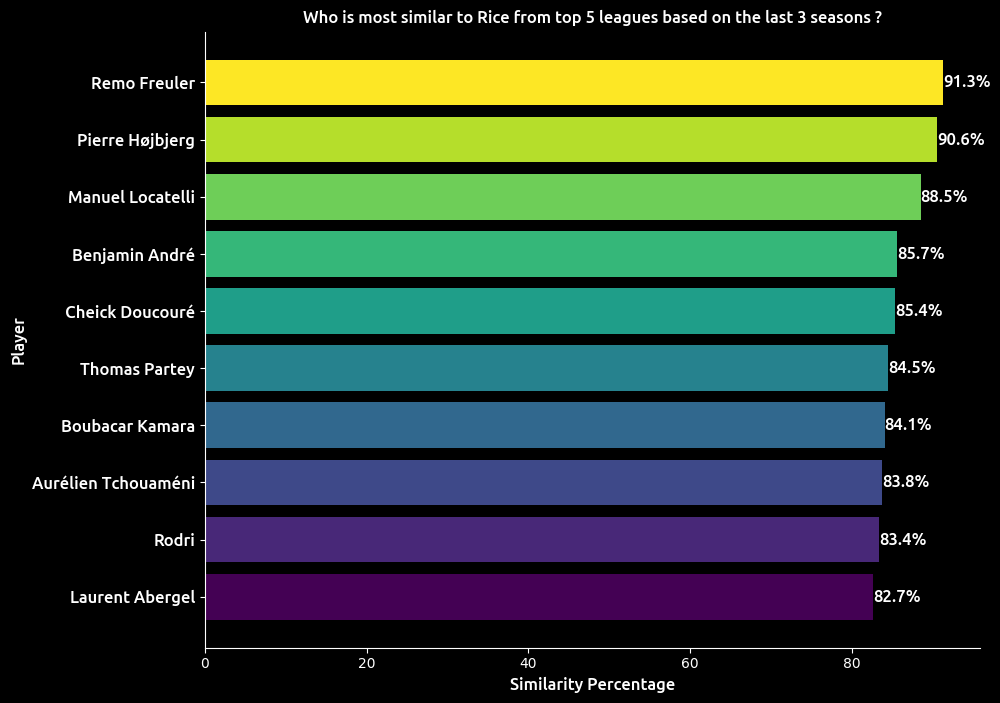

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the midfield_players DataFrame by similarity_to_rice in descending order
midfield_players_sorted = midfield_players.sort_values(by='similarity_to_rice', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(midfield_players_sorted['Player'].head(10)[::-1], (midfield_players_sorted['similarity_to_rice'].head(10)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Rice from top 5 leagues based on the last 3 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(midfield_players_sorted['Player'].head(10)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [35]:
midfield_players_sorted

Unnamed: 0                          Player   Nation Pos  \
88          363                    Remo Freuler   ch SUI  MF   
103         420                 Pierre Højbjerg   dk DEN  MF   
72          314                Manuel Locatelli   it ITA  MF   
30          138                  Benjamin André   fr FRA  MF   
33          157                 Cheick Doucouré   ml MLI  MF   
45          209                   Thomas Partey   gh GHA  MF   
53          239                 Boubacar Kamara   fr FRA  MF   
162         639             Aurélien Tchouaméni   fr FRA  MF   
5            20                           Rodri   es ESP  MF   
77          327                 Laurent Abergel   fr FRA  MF   
143         579                            Koke   es ESP  MF   
70          303                     Rúben Neves   pt POR  MF   
145         586                Valentin Rongier   fr FRA  MF   
48          227                        Jorginho   it ITA  MF   
119         481                 Sergio Busquets   es ESP  MF   
89          368                    Jordan Ferri   fr FRA  MF   
135         549                Marcelo Brozović   hr CRO  MF   
136         552                William Carvalho   pt POR  MF   
120         482                  Marten de Roon   nl NED  MF   
78          330               Pierre Lees-Melou   fr FRA  MF   
13           76                   Thiago Mendes   br BRA  MF   
59          265                Fabián Ruiz Peña   es ESP  MF   
17           86                  Jerdy Schouten   nl NED  MF   
179         726                            Fred   br BRA  MF   
152         606                     Joan Jordán   es ESP  MF   
19           98                 Guido Rodríguez   ar ARG  MF   
132         537                   Yves Bissouma   ml MLI  MF   
114         455                 Youri Tielemans   be BEL  MF   
144         585                          Walace   br BRA  MF   
47          226               Rodrigo Bentancur   uy URU  MF   
133         539                    Douglas Luiz   br BRA  MF   
92          375                Pedro Chirivella   es ESP  MF   
46          221                Martín Zubimendi   es ESP  MF   
196         821               Salis Abdul Samed   gh GHA  MF   
69          301                   Daniel Parejo   es ESP  MF   
156         617                 Scott McTominay  sct SCO  MF   
18           94              Idrissa Gana Gueye   sn SEN  MF   
125         500                Maxence Caqueret   fr FRA  MF   
98          393                 Ismaël Bennacer   dz ALG  MF   
155         615                  Étienne Capoue   fr FRA  MF   
76          326                   Franck Kessié   ci CIV  MF   
127         507                 Youssouf Fofana   fr FRA  MF   
57          262                Thiago Alcántara   es ESP  MF   
170         690                Mattéo Guendouzi   fr FRA  MF   
164         654                     Wataru Endo   jp JPN  MF   
123         491                    Mario Lemina   ga GAB  MF   
180         734               Nicolás Domínguez   ar ARG  MF   
27          130                   João Moutinho   pt POR  MF   
126         503                   Ellyes Skhiri   tn TUN  MF   
51          236                  Marco Verratti   it ITA  MF   
121         483                     Oriol Romeu   es ESP  MF   
149         600               Eduardo Camavinga   fr FRA  MF   
146         593                 Khéphren Thuram   fr FRA  MF   
177         708                     Djibril Sow   ch SUI  MF   
128         510      Andre-Frank Zambo Anguissa   cm CMR  MF   
109         445                  Haris Belkebla   dz ALG  MF   
174         702                        Fernando   br BRA  MF   
50          234                   Adrien Rabiot   fr FRA  MF   
66          293                   Mateo Kovačić   hr CRO  MF   
207         884               Stanislav Lobotka   sk SVK  MF   
11           67                     Luka Modrić   hr CRO  MF   
110         451                  Sofy

In [36]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_midfield_players = player_2023.select_dtypes(include=np.number)
numerical_midfield_players = numerical_midfield_players.iloc[:, 3:]
numerical_midfield_players = numerical_midfield_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_midfield_players = (numerical_midfield_players - numerical_midfield_players.mean()) / numerical_midfield_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_midfield_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.21164277496721268,
 0.386327405475278,
 0.462672070732257,
 0.5227514458421023,
 0.5646899419734386,
 0.6006855635632659,
 0.6319456016445786,
 0.6591806300285249,
 0.6818112810480521,
 0.7018409814437165,
 0.7188096395941738,
 0.734585138617731,
 0.7488583226879356,
 0.7623615751597114,
 0.7747407669394972]

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_midfield_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_midfield_players.index)



In [38]:
# Remove Harry rice's row and store it in a separate variable
rice_data = transformed_df.iloc[139].copy()
transformed_df = transformed_df.drop(transformed_df.index[139])

# Compute cosine similarity between each player and Harry rice
similarity_scores = cosine_similarity(transformed_df, rice_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_rice_2023'] = similarity_scores

# Display the top 10 players most similar to rice
top_similar_players = transformed_df.sort_values('similarity_to_rice_2023', ascending=False).head(10)


In [39]:
# Get the top 10 players most similar to rice
top_similar_players_indices_2023 = transformed_df.sort_values('similarity_to_rice_2023', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_2023 = player_2023.loc[top_similar_players_indices_2023]
top_similar_players_2023

Unnamed: 0.1  Unnamed: 0                          Player   Nation Pos  \
273          2057        2506               Boubakary Soumaré   fr FRA  MF   
213          1583        1900                   Wilfred Ndidi   ng NGA  MF   
112           904        1086                      Ilia Gruev   bg BUL  MF   
141          1132        1356                  Atakan Karazor   de GER  MF   
196          1455        1745                  Soualiho Meïté   fr FRA  MF   
110           890        1067                  Alberto Grassi   it ITA  MF   
294          2193        2676             Chimuanya Ugochukwu   fr FRA  MF   
339          2511         148                  Gonzalo Villar   es ESP  MF   
221          1670        2010                     Salih Özcan   tr TUR  MF   
132          1043        1250                  Bonke Innocent   ng NGA  MF   
105           873        1046                 Maxime Gonalons   fr FRA  MF   
95            809         969         Iñigo Ruiz de Galarreta   es ESP  MF   
271          2028        2466                    Oliver Skipp  eng ENG  MF   
161          1244        1484                     Roméo Lavia   be BEL  MF   
185          1366        1638                    Orel Mangala   be BEL  MF   
305          2278        2784                    Julian Weigl   de GER  MF   
341          2516         153                Christopher Wooh   cm CMR  MF   
23            229         266                  Haris Belkebla   dz ALG  MF   
192          1416        1698                    Eliot Matazo   be BEL  MF   
148          1180        1408              Geoffrey Kondogbia   cf CTA  MF   
97            815         976              Idrissa Gana Gueye   sn SEN  MF   
94            795         953                    Remo Freuler   ch SUI  MF   
290          2165        2641                     Lucas Torró   es ESP  MF   
170          1297        1551                Manuel Locatelli   it ITA  MF   
264          1985        2406                  Jerdy Schouten   nl NED  MF   
295          2205        2692                  Óscar Valentín   es ESP  MF   
2              17          20                     Tyler Adams   us USA  MF   
111           901        1083                  Christian Groß   de GER  MF   
113           905        1087                   Carlos Gruezo   ec ECU  MF   
9              64          73                   Ángel Algobia   es ESP  MF   
210          1545        1856              Samuel Moutoussamy   cd COD  MF   
157          1204        1435                     Rade Krunić   ba BIH  MF   
189          1392        1670                     Eric Martel   de GER  MF   
257          1940        2350               Fede San Emeterio   es ESP  MF   
60            519         604               Mathieu Coutadeur   fr FRA  MF   
128          1001        1199                  Nicolas Höfler   de GER  MF   
127           998        1196                 Morten Hjulmand   dk DEN  MF   
307          2300        2808                     Harry Winks  eng ENG  MF   
243          1856        2240                    Tomás Rincón   ve VEN  MF   
274          2061        2510                  Vinicius Souza   br BRA  MF   
250          1875        2262                 Guido Rodríguez   ar ARG  MF   
240          1843        2226                 Elvis Rexhbeçaj   de GER  MF   
158          1217        1450                 César de la Hoz   es ESP  MF   
58            514         597                      Samu Costa   pt POR  MF   
1               7           7                 Laurent Abergel   fr FRA  MF   
137          1087        1303                     Joan Jordán   es ESP  MF   
168          1287        1537                   Karol Linetty   pl POL  MF   
280          2098        2555                     Ivan Šunjić   hr CRO  MF   
282          2112        2575                   Adrien Tameze   cm CMR  MF   
223          1681        2023                   João Palhinha   pt POR  MF   
291          2168        26

In [40]:
player_2023['similarity_to_rice_2023']=transformed_df['similarity_to_rice_2023']
player_2023[['Player', 'similarity_to_rice_2023']]


Player  similarity_to_rice_2023
0                 Salis Abdul Samed                 0.284052
1                   Laurent Abergel                 0.573219
2                       Tyler Adams                 0.650898
3                     Lucien Agoume                 0.450788
4                     Álvaro Aguado                 0.058807
5                 Jean-Eudes Aholou                 0.097193
6                      Luis Alberto                -0.752577
7                  Thiago Alcántara                 0.144625
8                     Rubén Alcaraz                 0.238974
9                     Ángel Algobia                 0.642636
10   Domingos André Ribeiro Almeida                -0.447793
11                   Sofyan Amrabat                 0.237654
12                   Benjamin André                 0.118425
13                   Robert Andrich                 0.480500
14                  Mauro Arambarri                 0.228384
15                Maximilian Arnold                -0.114635
16                    Tolgay Arslan                -0.171686
17                 Tommaso Baldanzi                -0.165346
18               Filippo Bandinelli                -0.256608
19                   Nicolò Barella                -0.681232
20         Leandro Barreiro Martins                 0.099739
21                  Mickaël Barreto                -0.117153
22                   Cyrille Bayala                -0.106153
23                   Haris Belkebla                 0.693013
24                  Jude Bellingham                -0.390133
25                     Fran Beltrán                 0.288342
26                  Ismaël Bennacer                -0.364244
27                   Nabil Bentaleb                -0.108888
28                Rodrigo Bentancur                -0.130453
29                    Yves Bissouma                 0.497130
30                      Alexis Blin                 0.459019
31                Jean-Paul Boëtius                 0.457750
32              Giacomo Bonaventura                -0.523607
33                  Hicham Boudaoui                 0.166410
34                   Mehdi Bourabia                -0.152960
35                     Edoardo Bove                 0.319818
36                   Darko Brašanac                 0.252327
37                 Marcelo Brozović                -0.288431
38                  Sergio Busquets                 0.032029
39                   Moisés Caicedo                 0.076831
40                      Tom Cairney                -0.463611
41                     Jens Cajuste                -0.052903
42                 Hakan Çalhanoğlu                -0.516010
43                     Mahdi Camara                 0.505764
44                   Mohamed Camara                 0.538487
45                         Emre Can                 0.526937
46                   Étienne Capoue                 0.102284
47                 Maxence Caqueret                -0.604284
48                 William Carvalho                -0.155870
49              Michele Castagnetti                 0.135725
50                   Danilo Cataldi                 0.522971
51                    Dani Ceballos                -0.180738
52                Xavier Chavalerin                 0.231015
53                 Pedro Chirivella                 0.444454
54                    Joris Chotard                 0.517984
55                   Andrea Colpani                -0.403826
56                   Santi Comesaña                -0.133829
57                       Lewis Cook                 0.386288
58                       Samu Costa                 0.575187
59                Lassana Coulibaly                 0.316606
60                Mathieu Coutadeur                 0.613852
61                           Danilo                -0.002557
62                     Sergi Darder                -0.552188
63                     Josh Dasilva                -0.253738
64                  Kevin De Bruyne                -0.804140
65 

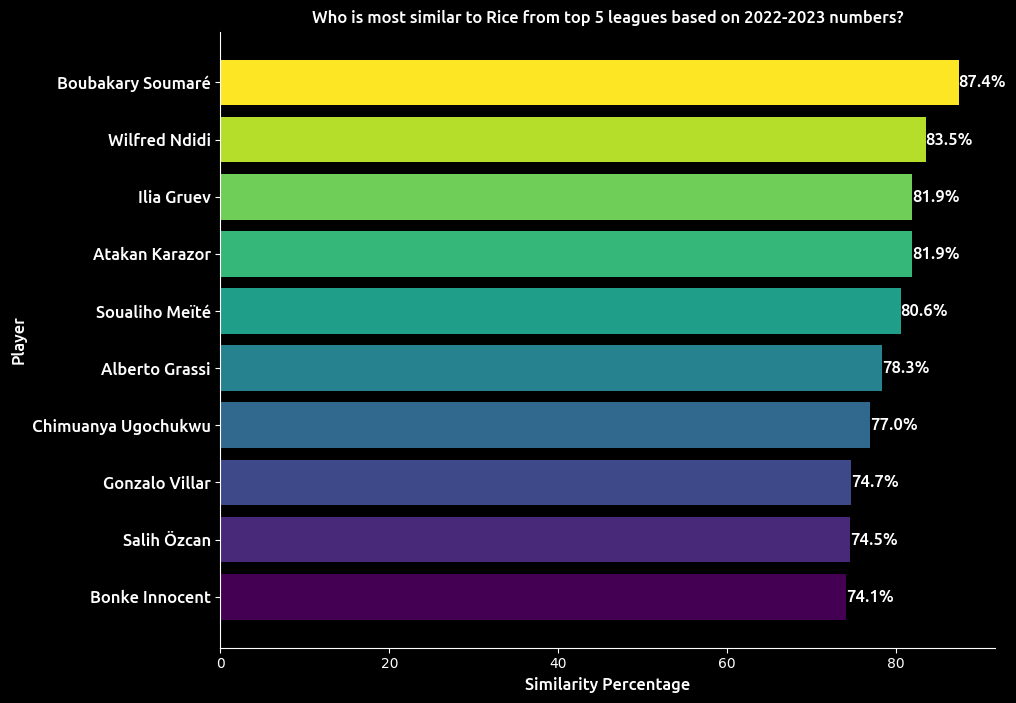

In [41]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the forward_players DataFrame by similarity_to_rice in descending order
forward_players_sorted = player_2023.sort_values(by='similarity_to_rice_2023', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(forward_players_sorted['Player'].head(10)[::-1], (forward_players_sorted['similarity_to_rice_2023'].head(10)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Rice from top 5 leagues based on 2022-2023 numbers?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(forward_players_sorted['Player'].head(10)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)
# Save the figure
plt.savefig('Similar_2023.png', transparent=False,dpi=500,bbox_inches = 'tight')

plt.show()
